# Boxplot of model fit metrics 

In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib

In [2]:
# list of models
# Commented few models because they produced very big results which interfere visualization
models = [
          'ExtraTreesRegressor',
        'ExtraTreeRegressor',
        'RandomForestRegressor',
          'BaggingRegressor',
          'DecisionTreeRegressor',
                   'MLPRegressor',
          
          
           #'GaussianProcessRegressor',
          'GradientBoostingRegressor',
          'HuberRegressor',
    'TheilSenRegressor',
    'AdaBoostRegressor',
          'KNeighborsRegressor',
       'DummyRegressor'

          #'PassiveAggressiveRegressor',
          #'RANSACRegressor',
          #'SGDRegressor',
          
    
  
         ]
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']

In [3]:
data = pd.read_csv('../results/AdaBoostRegressor_metrics_cross_validation_1.csv')

In [4]:
#data.building.str.contains("Office")

In [5]:
def assign_buildingtype(name):
    if "Office" in name:
        return "Office"
    elif "PrimClass" in name:
        return "PrimClass"
    elif "UnivClass" in name:
        return "UnivClass"
    elif "UnivDorm" in name:
        return "UnivDorm"
    else:
        return "UnivLab"

In [6]:
data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
data['cv_mode'] = str(1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
building        482 non-null object
MAPE            482 non-null float64
NMBE            482 non-null float64
CVRSME          482 non-null float64
RSQUARED        482 non-null float64
buildingtype    482 non-null object
cv_mode         482 non-null object
dtypes: float64(4), object(3)
memory usage: 26.4+ KB


In [8]:
data.melt(id_vars=['buildingtype','cv_mode'], value_vars='MAPE').head()

,buildingtype,cv_mode,variable,value
0,UnivLab,1,MAPE,15.213087
1,UnivLab,1,MAPE,9.538444
2,UnivLab,1,MAPE,10.443308
3,UnivLab,1,MAPE,10.609274
4,UnivLab,1,MAPE,21.976626


In [9]:
# for value in range(1,5):
#     print(value)

In [10]:
#MAPE['RandomForestRegressor']

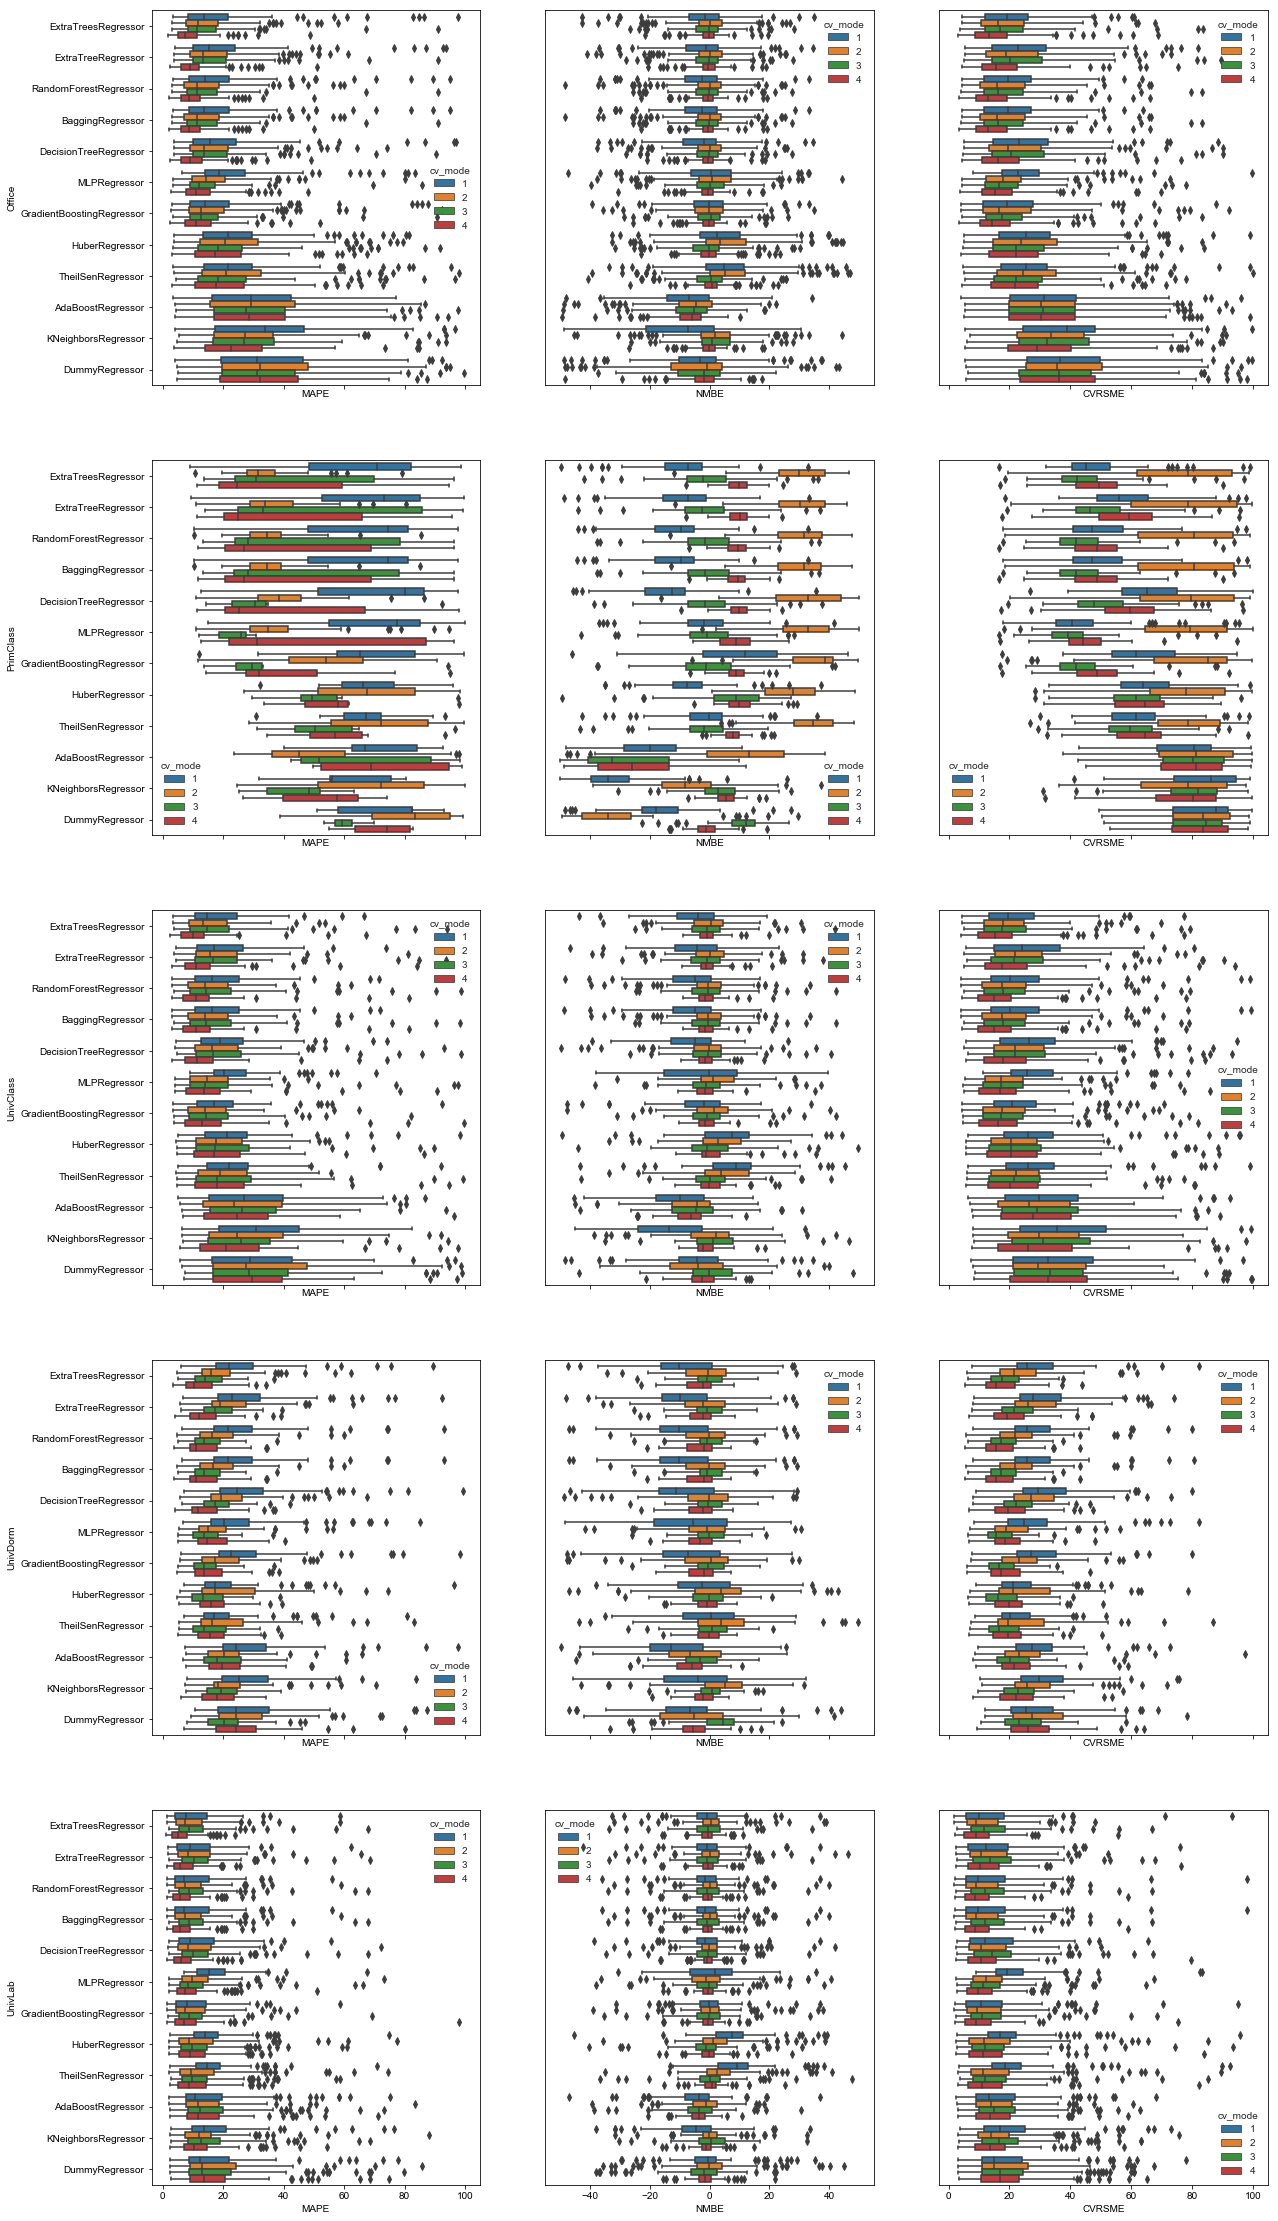

In [11]:
f, axes = plt.subplots(5, 3, figsize=(20,40), sharex='col')
plt.style.use('seaborn-whitegrid')

for buildingtype in buildingtypes:
        # Draw lines on single plot
#         MAPE = {}
#         NMBE = {}
#         CVRSME = {}
    dataframes = []
    for i in range(len(models)):

        cv_range = range(1,5)

        for cv_mode in cv_range:


            data = pd.read_csv('../results/' + models[i] + '_metrics_cross_validation_'+str(cv_mode)+'.csv')
            #data = data.drop(columns=['Unnamed: 0'])
    #                 data['buidingtype'] = buildingtype
            data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
            data['cv_mode'] = str(cv_mode)
            data['model'] = models[i]
            dataframes.append(data)
            result = pd.concat(dataframes)

    #             MAPE[models[i]] =  result[result['buidingtype']==buildingtype]['MAPE']
    #             NMBE[models[i]] =  result[result['buidingtype']==buildingtype]['NMBE']
    #             CVRSME[models[i]] =  result[result['buidingtype']==buildingtype]['CVRSME']
    MAPE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='MAPE')
    #         MAPE_df = pd.DataFrame(MAPE)
    #         MAPE_df = MAPE_df[MAPE_df<100].melt()
    ax1 = sns.boxplot(data=MAPE[MAPE.buildingtype == buildingtype][MAPE<100], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),0])
    ax1.set(ylabel=buildingtype, xlabel="MAPE")

    NMBE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='NMBE')
    #         NMBE_df = pd.DataFrame(NMBE)
    #         NMBE_df = NMBE_df[NMBE_df>-50].melt() #[NMBE_df<100]
    # ax2 = sns.boxplot(data=NMBE, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),1])
    # ax2.set(ylabel="", xlabel="NMBE", yticks=[])
    ax2 = sns.boxplot(data=NMBE[NMBE.buildingtype == buildingtype][(NMBE<50)&(NMBE>-50)], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),1])
    ax2.set(ylabel="", xlabel="NMBE", yticks=[])

    CVRSME = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='CVRSME')
    #         CVRSME_df = pd.DataFrame(CVRSME)
    #         CVRSME_df = CVRSME_df[CVRSME_df<100].melt() #[NMBE_df<100]
    # ax3 = sns.boxplot(data=CVRSME, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),2])
    # ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
    ax3 = sns.boxplot(data=CVRSME[CVRSME.buildingtype == buildingtype][(CVRSME<100)], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),2])
    ax3.set(ylabel="", xlabel="CVRSME", yticks=[])

    #             sns.boxplot(y="b", x= "a", data=rows,  orient='v' ) #, ax=axes[0]
    #             print(rows)
        # Single line creator
    #             value, = plt.plot(rows, styles[i], label=models[i])

    # sns.boxplot(y="b", x= "a", data=df,  orient='v' , ax=axes[0])
    # sns.boxplot(y="c", x= "a", data=df,  orient='v' , ax=axes[1])

# Let's make each building use type in its own graphic

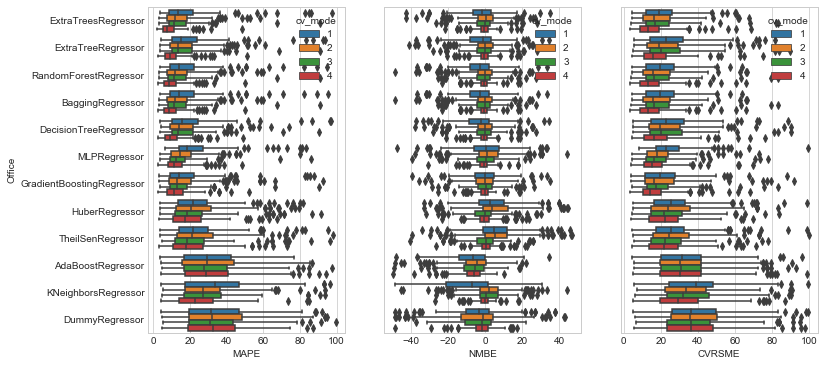

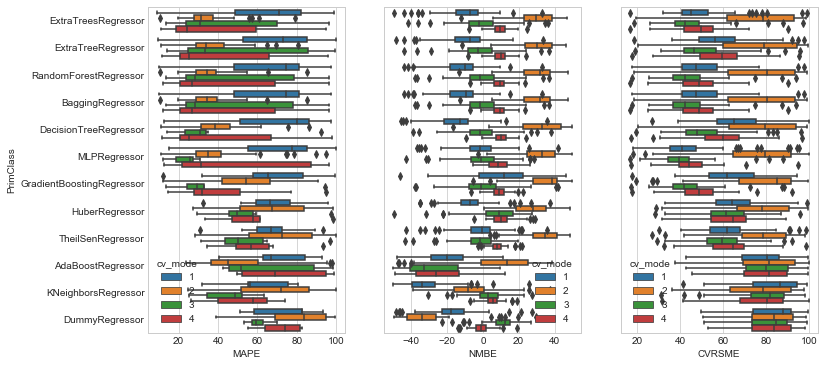

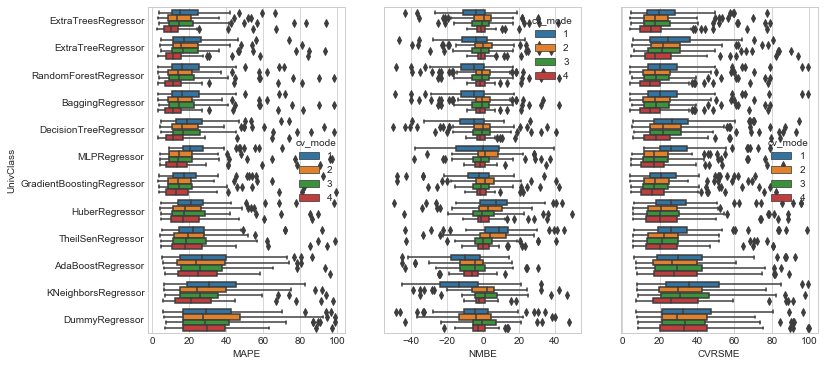

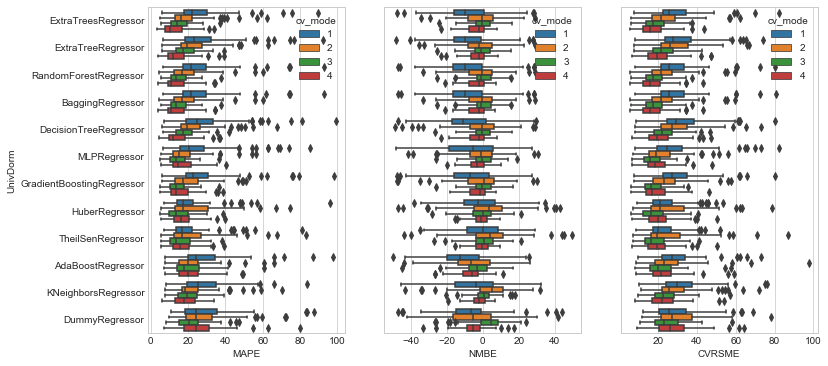

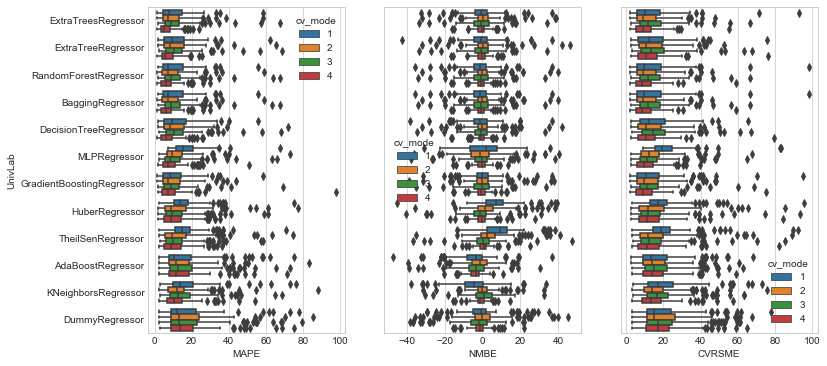

In [12]:
for buildingtype in buildingtypes:
    
    f, axes = plt.subplots(1, 3, figsize=(12,6)) #, sharex='col'
    plt.style.use('seaborn-whitegrid')

    dataframes = []
    for i in range(len(models)):

        cv_range = range(1,5)

        for cv_mode in cv_range:


            data = pd.read_csv('../results/' + models[i] + '_metrics_cross_validation_'+str(cv_mode)+'.csv')
            #data = data.drop(columns=['Unnamed: 0'])
    #                 data['buidingtype'] = buildingtype
            data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
            data['cv_mode'] = str(cv_mode)
            data['model'] = models[i]
            dataframes.append(data)
            result = pd.concat(dataframes)

    #             MAPE[models[i]] =  result[result['buidingtype']==buildingtype]['MAPE']
    #             NMBE[models[i]] =  result[result['buidingtype']==buildingtype]['NMBE']
    #             CVRSME[models[i]] =  result[result['buidingtype']==buildingtype]['CVRSME']
    MAPE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='MAPE')
    #         MAPE_df = pd.DataFrame(MAPE)
    #         MAPE_df = MAPE_df[MAPE_df<100].melt()
    ax1 = sns.boxplot(data=MAPE[MAPE.buildingtype == buildingtype][MAPE<100], x='value', y='model', hue='cv_mode', ax=axes[0])
    ax1.set(ylabel=buildingtype, xlabel="MAPE")

    NMBE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='NMBE')
    #         NMBE_df = pd.DataFrame(NMBE)
    #         NMBE_df = NMBE_df[NMBE_df>-50].melt() #[NMBE_df<100]
    # ax2 = sns.boxplot(data=NMBE, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),1])
    # ax2.set(ylabel="", xlabel="NMBE", yticks=[])
    ax2 = sns.boxplot(data=NMBE[NMBE.buildingtype == buildingtype][(NMBE<50)&(NMBE>-50)], x='value', y='model', hue='cv_mode', ax=axes[1])
    ax2.set(ylabel="", xlabel="NMBE", yticks=[])

    CVRSME = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='CVRSME')
    #         CVRSME_df = pd.DataFrame(CVRSME)
    #         CVRSME_df = CVRSME_df[CVRSME_df<100].melt() #[NMBE_df<100]
    # ax3 = sns.boxplot(data=CVRSME, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),2])
    # ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
    ax3 = sns.boxplot(data=CVRSME[CVRSME.buildingtype == buildingtype][(CVRSME<100)], x='value', y='model', hue='cv_mode', ax=axes[2])
    ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
    
    plt.show()

# Let's add a bar chart at the end to be able to quantifiably compare

In [13]:
result[result.buildingtype == "Office"].groupby("model").median().abs()#.sum(axis=1)

,MAPE,NMBE,CVRSME,RSQUARED
model,,,,
AdaBoostRegressor,30.147372,5.892252,31.007472,0.178166
BaggingRegressor,11.601503,0.755890,16.056788,0.731690
DecisionTreeRegressor,13.326202,0.638326,19.630366,0.600207
DummyRegressor,34.294064,2.390277,36.399436,0.039168
ExtraTreeRegressor,13.270436,0.503339,19.511515,0.624264
ExtraTreesRegressor,11.442749,0.509610,16.195075,0.730339
GradientBoostingRegressor,13.298825,0.282542,16.823299,0.713874
HuberRegressor,21.212230,0.861374,23.410075,0.551401
KNeighborsRegressor,29.125520,0.314254,33.779059,0.028125


In [14]:
result[result.buildingtype == "Office"].groupby("model").median().abs().drop(["RSQUARED"],axis=1).sum(axis=1)

model
AdaBoostRegressor            67.047095
BaggingRegressor             28.414182
DecisionTreeRegressor        33.594894
DummyRegressor               73.083777
ExtraTreeRegressor           33.285290
ExtraTreesRegressor          28.147434
GradientBoostingRegressor    30.404666
HuberRegressor               45.483680
KNeighborsRegressor          63.218833
MLPRegressor                 33.114874
RandomForestRegressor        28.413533
TheilSenRegressor            47.281921
dtype: float64

In [15]:
result[result.buildingtype == "Office"].groupby("model").median().abs().drop(["RSQUARED"],axis=1).sum(axis=1).sort_values()

model
ExtraTreesRegressor          28.147434
RandomForestRegressor        28.413533
BaggingRegressor             28.414182
GradientBoostingRegressor    30.404666
MLPRegressor                 33.114874
ExtraTreeRegressor           33.285290
DecisionTreeRegressor        33.594894
HuberRegressor               45.483680
TheilSenRegressor            47.281921
KNeighborsRegressor          63.218833
AdaBoostRegressor            67.047095
DummyRegressor               73.083777
dtype: float64

In [16]:
list(result[result.buildingtype == "Office"].groupby("model").median().abs().drop(["RSQUARED"],axis=1).sum(axis=1).sort_values().index)

['ExtraTreesRegressor',
 'RandomForestRegressor',
 'BaggingRegressor',
 'GradientBoostingRegressor',
 'MLPRegressor',
 'ExtraTreeRegressor',
 'DecisionTreeRegressor',
 'HuberRegressor',
 'TheilSenRegressor',
 'KNeighborsRegressor',
 'AdaBoostRegressor',
 'DummyRegressor']

In [93]:
name_mapping = {"Office":"Office","PrimClass":"Primary School","UnivDorm":"Univ. Dorm","UnivClass":"Univ. Classroom","UnivLab":"Univ. Lab"}


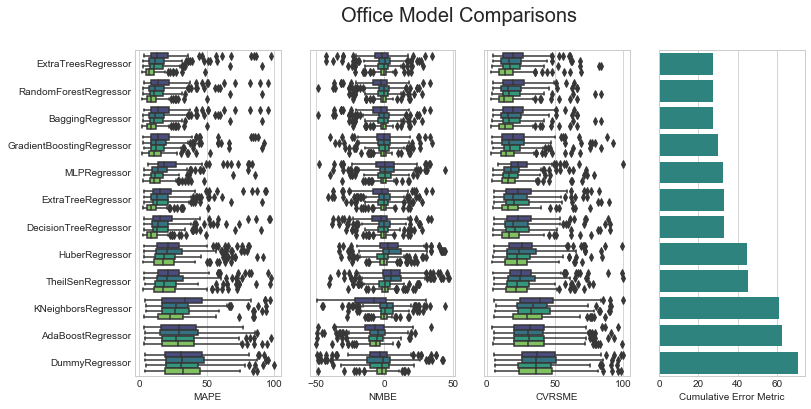

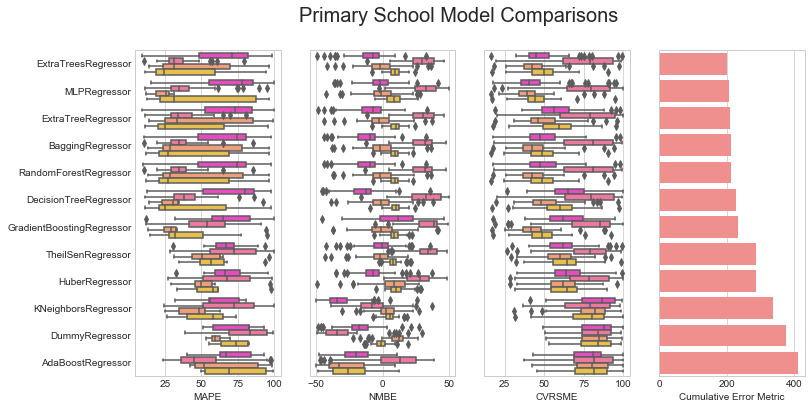

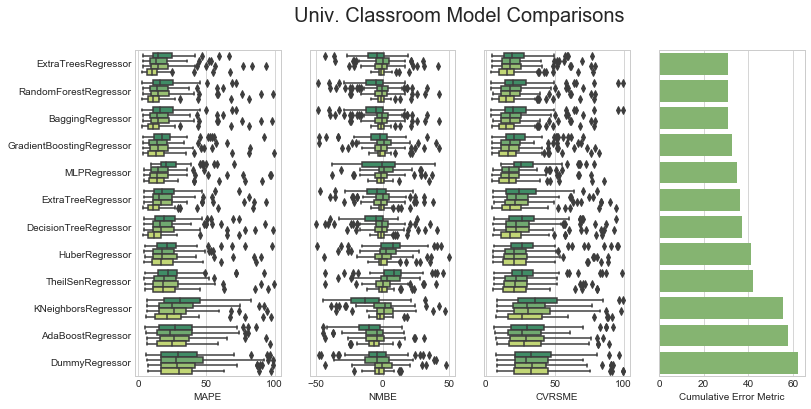

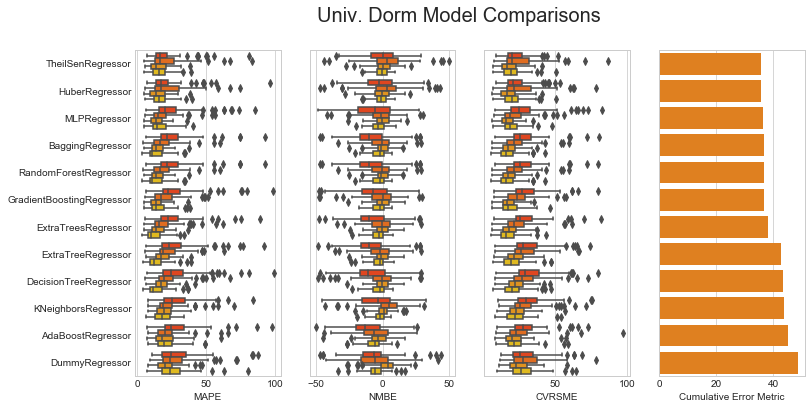

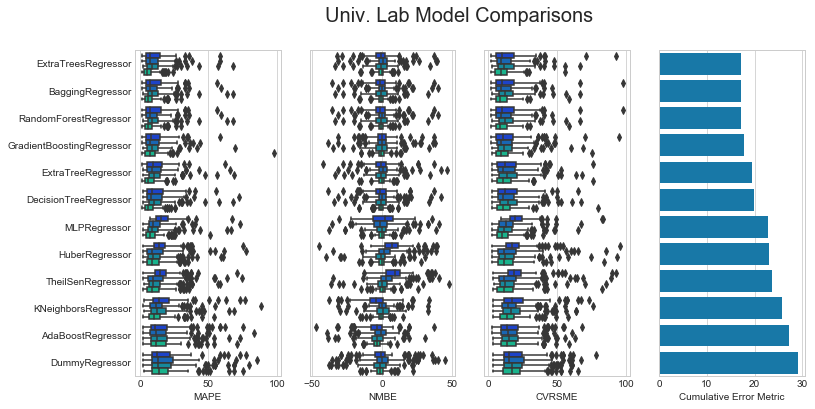

In [94]:
color_palattes = ["viridis","spring","summer","autumn","winter"]

for buildingtype in buildingtypes:
    
    f, axes = plt.subplots(1, 4, figsize=(12,6)) #, sharex='col'
    plt.style.use('seaborn-whitegrid')
    f.suptitle(name_mapping[buildingtype]+" Model Comparisons", fontsize=20)
    
    models_in_order = list(result[result.buildingtype == buildingtype].groupby("model").median().abs().drop(["RSQUARED"],axis=1).sum(axis=1).sort_values().index)

    dataframes = []
    for i in range(len(models_in_order)):

        cv_range = range(1,5)

        for cv_mode in cv_range:
            data = pd.read_csv('../results/' + models_in_order[i] + '_metrics_cross_validation_'+str(cv_mode)+'.csv')
            data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
            data['cv_mode'] = str(cv_mode)
            data['model'] = models_in_order[i]
            dataframes.append(data)
            result = pd.concat(dataframes)

    MAPE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='MAPE')
    ax1 = sns.boxplot(data=MAPE[MAPE.buildingtype == buildingtype][MAPE<100], x='value', y='model', hue='cv_mode', palette=color_palattes[buildingtypes.index(buildingtype)], ax=axes[0])
    ax1.set(ylabel="", xlabel="MAPE")
    ax1.get_legend().remove()

    NMBE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='NMBE')
    ax2 = sns.boxplot(data=NMBE[NMBE.buildingtype == buildingtype][(NMBE<50)&(NMBE>-50)], x='value', y='model', hue='cv_mode', palette=color_palattes[buildingtypes.index(buildingtype)], ax=axes[1])
    ax2.set(ylabel="", xlabel="NMBE", yticks=[])
    ax2.get_legend().remove()

    CVRSME = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='CVRSME')
    ax3 = sns.boxplot(data=CVRSME[CVRSME.buildingtype == buildingtype][(CVRSME<100)], x='value', y='model', hue='cv_mode', palette=color_palattes[buildingtypes.index(buildingtype)], ax=axes[2])
    ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
    ax3.get_legend().remove()
    
    cmap = matplotlib.cm.get_cmap(color_palattes[buildingtypes.index(buildingtype)])
    rgba = cmap(0.5)
    ranking = pd.DataFrame({"metric":result[result.buildingtype == buildingtype].groupby("model").median().abs().drop(["RSQUARED","NMBE"],axis=1).sum(axis=1).sort_values()}).reset_index()
    ax4 = sns.barplot(data=ranking, x="metric", y="model", ax=axes[3], color=rgba)
    ax4.set(ylabel="", xlabel="Cumulative Error Metric", yticks=[])
    
    f.savefig(buildingtype+"_boxplot.pdf")
    plt.show()

In [21]:
ranking

,model,metric
0,ExtraTreesRegressor,27.637824
1,BaggingRegressor,27.658292
2,RandomForestRegressor,27.667190
3,GradientBoostingRegressor,30.122124
4,ExtraTreeRegressor,32.781951
5,DecisionTreeRegressor,32.956568
6,MLPRegressor,33.047403
7,HuberRegressor,44.622305
8,TheilSenRegressor,45.215245
9,AdaBoostRegressor,61.154843


# Make categorical plot

In [58]:
total_models_in_order = list(result.groupby("model").median().abs().drop(["RSQUARED"],axis=1).sum(axis=1).sort_values().index)

In [59]:
total_models_in_order

['ExtraTreesRegressor',
 'BaggingRegressor',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'MLPRegressor',
 'ExtraTreeRegressor',
 'DecisionTreeRegressor',
 'HuberRegressor',
 'TheilSenRegressor',
 'KNeighborsRegressor',
 'AdaBoostRegressor',
 'DummyRegressor']

https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

In [73]:
anova_df = result[result.MAPE<100].groupby(["buildingtype","model","cv_mode"]).median().drop(["NMBE","RSQUARED"],axis=1).reset_index()


In [74]:
anova_df = anova_df.melt(id_vars=["buildingtype","model"], value_vars=["MAPE","CVRSME"])

In [75]:
anova_df.model = anova_df.model.astype("category")
anova_df.model.cat.set_categories(total_models_in_order, inplace=True)


In [76]:
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
buildingtype    480 non-null object
model           480 non-null category
variable        480 non-null object
value           480 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 12.2+ KB


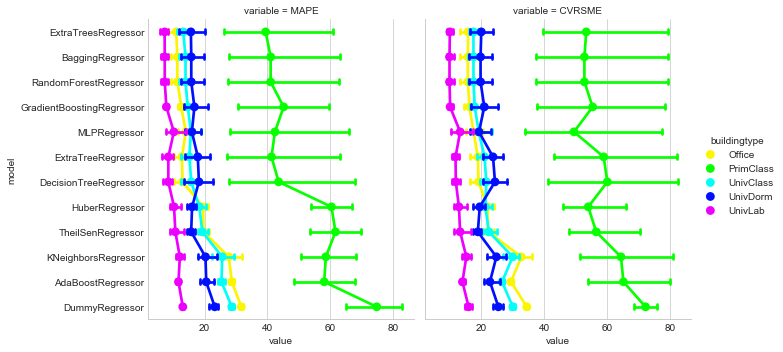

In [87]:
g = sns.catplot(x="value", y="model", hue="buildingtype", col="variable",
                capsize=.2, palette="hsv", height=5,
                kind="point", data=anova_df, title="Category Comparison of Models")
g.savefig("Cat_Plot.pdf")